# 0. Konfiguration der Arbeitsumgebung
**Hinweis zur Ausführung:**

Bevor Sie mit dem Ausfüllen des Protokolls beginnen, stellt diese Zelle sicher, dass alle notwendigen Software-Bibliotheken installiert und verfügbar sind. Diese sogenannten „Pakete“ (z. B. `ipywidgets` für die interaktiven Eingabefelder) sind erforderlich, damit das Notebook korrekt funktioniert.

**Was in dieser Zelle passiert:**
- Es wird geprüft, ob alle benötigten Pakete bereits in Ihrer Jupyter-Umgebung installiert sind.
- Falls ein Paket fehlt, wird es automatisch installiert.
- Dies funktioniert unabhängig davon, ob Sie mit Anaconda (Windows) oder venv (macOS/Linux) arbeiten.

**Was Sie tun müssen:**
- Führen Sie diese Zelle **einmalig aus**, bevor Sie mit dem Protokoll arbeiten.
- Es ist **keine manuelle Installation** in der Konsole notwendig.
- Falls eine Installation erfolgt, kann es kurz dauern – warten Sie bitte, bis die Zelle vollständig durchgelaufen ist.

**Hinweis:** Falls Sie das Notebook ohne Internetverbindung verwenden, können fehlende Pakete nicht nachgeladen werden.

**Führen Sie jetzt die folgende Zelle aus:** 

In [1]:
import sys
import subprocess

# Benötigte Pakete
pakete = ["numpy", "pandas", "matplotlib", "ipywidgets", "requests"]

installiert = 0
fehler = []

# Pakete prüfen und installieren
for paket in pakete:
    try:
        __import__(paket)
    except ImportError:
        try:
            print(f"Installiere {paket}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", paket], 
                                 stdout=subprocess.DEVNULL)
            installiert += 1
        except:
            fehler.append(paket)

# Pakete importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import requests, json, os

# Status anzeigen
if fehler:
    print(f"FEHLER bei: {", ".join(fehler)}")
    print("-> Bitte manuell installieren: pip install <paketname>")
elif installiert > 0:
    print(f"{installiert} Paket/e erfolgreich installiert!")
else:
    print("Alle Pakete bereits vorhanden!")

print("Setup abgeschlossen - bereit für das Praktikum!")

Alle Pakete bereits vorhanden!
Setup abgeschlossen - bereit für das Praktikum!


In [2]:
import ipywidgets as widgets
from IPython.display import display
import requests, json, os

# --- Konfiguration ---
VERSUCH = "Photovoltaik"  # ← hier den Versuchsnamen ändern
FILENAME = f"protokoll_{VERSUCH}.json"
FIELD_WIDTH = '500px'
LABEL_WIDTH = '160px'
LOGO_URL = "https://thga.sciebo.de/s/PMFfmxdyEcrEr3P/download"

# --- Felder und Standarddaten ---
fields = {
    "Name": "",
    "Matrikelnummer": "",
    "Gruppe": "",
    "Versuchstag": "",
    "Praktikumsleitung": ""
}

# --- Daten aus Datei laden ---
if os.path.exists(FILENAME):
    with open(FILENAME, "r") as f:
        fields.update(json.load(f))

# --- Logo laden ---
try:
    resp = requests.get(LOGO_URL)
    logo = widgets.Image(
        value=resp.content, format='png',
        layout=widgets.Layout(width='200px', height='auto')
    ) if resp.status_code == 200 else widgets.Label("Logo nicht verfügbar.")
except:
    logo = widgets.Label("Logo konnte nicht geladen werden.")

# --- Überschriftsteil ---
headings = widgets.VBox([
    widgets.HTML(f'<div style="font-size: 20pt; font-weight: bold;">Protokoll zum Versuch: {VERSUCH.capitalize()}</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Praktikum:</strong> Regenerative Energien II</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Semester:</strong> Wintersemester 2025/26</div>')
], layout=widgets.Layout(align_items='flex-start', gap='2px'))

header = widgets.HBox([headings, logo],
                      layout=widgets.Layout(justify_content='space-between', align_items='flex-start'))

# --- Formularfelder anlegen ---
widgets_dict = {
    key: widgets.Text(value=fields[key], layout=widgets.Layout(width=FIELD_WIDTH))
    for key in fields
}

def labeled_row(label, widget):
    return widgets.HBox([
        widgets.Label(label + ":", layout=widgets.Layout(width=LABEL_WIDTH)),
        widget
    ])

form = widgets.VBox([labeled_row(k, widgets_dict[k]) for k in fields])

# --- Speichern ---
def save_to_json(_):
    data = {k: w.value for k, w in widgets_dict.items()}
    with open(FILENAME, "w") as f:
        json.dump(data, f)
    print(f"Daten gespeichert in '{FILENAME}'.")

save_button = widgets.Button(description="Speichern", button_style='success')
save_button.on_click(save_to_json)

# --- Anzeige ---
display(header, widgets.HTML("<hr>"), form, save_button)

HTML(value='<hr>')

Button(button_style='success', description='Speichern', style=ButtonStyle())

---

# 1. Einleitung
**Hinweis zur Bearbeitung:**

Bevor Sie mit dem Versuch beginnen, formulieren Sie bitte eine kurze Einleitung. Beschreiben Sie in eigenen Worten die grundlegenden Prinzipien der Photovoltaik und das Wissen, dass benötigt wird um dieses Protokoll nachvollziehen zu können.


 **Denkanstöße für Ihre Einleitung:**
- Auf welchen Prinzipien beruht die Photovoltaik?
- Welche Materialien spielen dabei eine Rolle und warum?
- Welche Rolle spielt Photovoltaik in der Energiewende? 
- Wie sieht der Aufbau und die Funktion einer Solarzelle aus?
- Welche praktischen Anwendungen von Photovoltaik kennen Sie?
- Wofür wird Photovoltaik überwiegend eingesetzt?

 **Tragen Sie Ihre eigene Einleitung im folgenden Feld ein:**

---

# 2. Durchführung und Auswertung

## 2.1 Versuch 1: Reihen und Parallelschaltung von Solarzellen

In diesem Versuch werden mehrere Solarzellen (mittlere und eine kleine) verwendet, um das Verhalten bei Reihen und Parallelschaltung zu untersuchen. Ziel ist es, die Auswirkung der Schaltungsart auf die Leerlaufspannung $( U_\text{L} )$ und Kurzschlussstromstärke $( I_\text{K} )$ zu erfassen.

Die Solarzellen werden durch ein Beleuchtungsmodul mit Powermodul (6 V) beleuchtet. Die Messungen erfolgen mit einem AV-Modul.

---

 **Aufbau, Geräte & Komponenten:**
- Grundeinheit
- 3 mittlere Solarzellen  
- 1 kleine Solarzelle  
- 3 Beleuchtungsmodule  
- AV-Modul  
- Powermodul (6 V)

---

**Schaltplan:**

Parallelschaltung:

![Schaltplan Versuch1.1](https://thga.sciebo.de/s/EtdjPDGps7PSN9D/download "Parallelschaltung")

Reihenschaltung:

![Schaltplan Versuch1.1](https://thga.sciebo.de/s/Ax88W8tiQNcFKRw/download "Reihenschaltung")

---

**Durchführung**

1. Bauen Sie den Versuchsplan für die Parallelschaltung auf, zunächst jedoch nur mit 1 mittleren Solarzelle.
   1. Messen Sie die Leerlaufspannung $U_\mathrm{L}$ und die Kurzschlussstromstärke $I_\mathrm{K}$ einer Solarzelle. Verändern Sie die Schaltung danach so, dass zwei bzw. drei Solarzellen parallelgeschaltet sind (siehe Schaltplan). Nehmen Sie jeweils $U_\mathrm{L}$ und $I_\mathrm{K}$ auf.
   2. Schalten Sie nun 2 mittlere und 1 kleine Solarzelle parallel und messen Sie erneut Leerlaufspannung $U_\mathrm{L}$ und die Kurzschlussstromstärke $I_\mathrm{K}$.
2. Bauen Sie den Versuchsaufbau für die Reihenschaltung auf, zunächst jedoch mit nur 1 Solarzelle.
    1. Messen Sie die Leerlaufspannung $U_\mathrm{L}$ und die Kurzschlussstromstärke $I_\mathrm{K}$ einer Solarzelle. Verändern Sie die Schaltung danach so, dass zwei bzw. drei Solarzellen in Reihe geschaltet sind (siehe Schaltplan). Nehmen Sie jeweils $U_\mathrm{L}$ und $I_\mathrm{K}$ auf.
    2. Schalten Sie nun 2 mittlere Solarzellen und eine kleine Solarzelle in Reihe und messen Sie erneut Kurzschlussstrom $U_\mathrm{L}$ und Leerlaufspannung $I_\mathrm{K}$.
    3. Messen Sie Kurzschlussstrom $U_\mathrm{L}$ und Leerlaufspannung $I_\mathrm{K}$ einer kleinen Solarzelle zum Vergleich.
---

 **Messgrößen:** 
- Die Leerlaufspannung $U_\mathrm{L}$  in $\text{[V]}$
- Der Kurzschlussstrom $I_\mathrm{K}$ in $\text{[mA]}$

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in Listen. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel, und zeichnen Sie daraus eine Tabelle:

In [29]:
# Beispiel-Messwerte für Aufgabe 1-1:
u_1a = [537, 534, 532, 531]
i_1a = [17.2, 35.3, 51.3, 45]
m_1a = ["1 mittlere Solarzelle", "2 mittlere Solarzellen", "3 mittlere Solarzellen", "2 mittlere 1 kleine Solarzelle"]

# Beispiel-Messwerte für Aufgabe 1-2:
u_1b = [541, 1070, 1570, 1570, 530]
i_1b = [22.0, 21.3, 17.2, 11.1, 10.5]
m_1b = ["1 mittlere Solarzelle", "2 mittlere Solarzellen", "3 mittlere Solarzellen", "2 mittlere 1 kleine Solarzelle", "1 kleine Solarzelle"]

Aus diesen Messwerten wird nun mit folgendem Beispielhaften Code eine Tabelle erzeugt:

> Die Messwerte müssen nicht nochmal in den Code eingefügt werden, solange die Zelle mit den Messwerten zuvor prozessiert wird. Bedenken Sie außerdem, dass der Index für den ersten Wert eine Reihe bei Python bei `[0]` beginnt.

In [34]:
# Messwerte für Aufgabe 1-1 in DataFrames speichern:
df_1a = pd.DataFrame({
    "Anzahl Solarzellen": m_1a,
    "U [V]": u_1a,
    "I [mA]": i_1a})

# Messwerte für Aufgabe 1-2 in DataFrames speichern:
df_1b = pd.DataFrame({
    "Anzahl Solarzellen": m_1b,
    "U [V]": u_1b,
    "I [mA]": i_1b})

# Indizes in "Messpunkte" umbenennen und Zählung bei 1 Starten
for df in [df_1a]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

for df in [df_1b]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

# Tabellen erstellen

print("Tabelle 1: Messdaten – Parallelschaltung")
display(df_1a.round(2).style.format(precision=1))

print("Tabelle 2: Messdaten – Reihenschaltung")
display(df_1b.round(2).style.format(precision=1))

Tabelle 1: Messdaten – Parallelschaltung


,Anzahl Solarzellen,U [V],I [mA]
Messpunkt 1,1 mittlere Solarzelle,537,17.2
Messpunkt 2,2 mittlere Solarzellen,534,35.3
Messpunkt 3,3 mittlere Solarzellen,532,51.3
Messpunkt 4,2 mittlere 1 kleine Solarzelle,531,45.0


Tabelle 2: Messdaten – Reihenschaltung


,Anzahl Solarzellen,U [V],I [mA]
Messpunkt 1,1 mittlere Solarzelle,541,22.0
Messpunkt 2,2 mittlere Solarzellen,1070,21.3
Messpunkt 3,3 mittlere Solarzellen,1570,17.2
Messpunkt 4,2 mittlere 1 kleine Solarzelle,1570,11.1
Messpunkt 5,1 kleine Solarzelle,530,10.5


---

 **Ihre Aufgabe:**  
Beschreiben Sie hier **in eigenen Worten**, den Aufbau, die Durchführung und Ihre Beobachtungen
- Wie haben Sie die Solarzellen verschaltet?  
- Welche Messgrößen haben Sie bei der Parallel und Reihenschaltung erhoben? 
- Wie haben sich Spannung und Strom verändert?  
- Gib es Auffälligkeiten beim Einsatz der kleinen Solarzelle?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._

---
 **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

---

**Auswertung**

1. Formulieren Sie die Gesetzmäßigkeiten für den Gesamtstrom und die Gesamtspannung bei Parallel- bzw. Reihenschaltung von gleichen Solarzellen.
2. Welche Schaltungsart sollte bei der Herstellung von Solarmodulten verwendet wrden, um technisch sinnvolle Ausgangsspannungen zu erhalten? *Tipp: in Haushalten wird eine Spannung von 230 V verwendet*
3. Wie ändern sich $U$ und $I$, wenn eine kleine Solarzelle mit in die Parallel- bzw. Reihenschaltung eingebunden wird? Was ist daher bei der Herstellung von Solarmodulen zu beachten?

---

## 2.2 Versuch 2: Teilverschattung von Solarmodulen

In diesem Versuch wird das Verhalten von in Reihe geschalteten Solarzellen unter Teilverschattung untersucht. Ziel ist zu beobachten, wie sich die elektrische Leistung verändert, wenn einzelne Zellen nicht vollständig beleuchtet sind, und wie eine Diode diesen Effekt beeinflussen kann.

---

 **Messgrößen:**  
- Leerlaufspannung $U_\mathrm{L}$ in $\text{[V]}$  
- Kurzschlussstrom $I_\mathrm{K}$ in $\text{[mA]}$
- Leistungsverringerung gegenüber Messung (1)

---

**Aufbau, Geräte und Komponenten**
- Grundeinheit
- 3 mittlere Solarzellen   
- 3 Beleuchtungsmodule  
- Diodenmodul
- AV-Modul  
- Powermodul (6 V)

---

**Schaltplan:**

![Schaltplan Versuch1.1](https://thga.sciebo.de/s/ezSSN4DcpHBKRtB/download "Teilverschattung")

---

**Durchführung**

1. Bauen Sie den Versuchsplan wie oben beschrieben auf, zunächst jedoch ohne das Diodenmodul. Schließen Sie alle 3 Beleuchtungsmodule parallel und verbinden Sie diese mit dem Powermodul (6 V) und stellen Sie diese auf die 3 Solarzellen.
    > Übernehmen Sie die Messwerte für Leerlaufspannung und Kurzschlussstromstärke aus Aufgabe 1.
2. Schalten Sie das Beleuchtungsmodul der linken Solarzelle aus und messen erneuet $U_\mathrm{L}$ und $I_\mathrm{K}$.
3. Schalten Sie nun zu der „verschatteten“ Solarzelle das das Diodenmodul parallel. Messen Sie $U_\mathrm{L}$ und $I_\mathrm{K}$.

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in Variablen. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im Beispiel aus Versuch 1, und zeichnen Sie daraus eine Tabelle.


In [35]:
# Messwerte Versuch 2
# Sie können die Messwerte für Leerlaufspannung und Kurzschlussstromstärke aus Versuch 1 übernehmen, indem Sie die in der obigen Variable abgespeicherten Daten hier wieder aufrufen

u_2 = u_1b[2], 1260, 1250
i_2 = i_1b[2], 0.9, 17.4
m_2 = "Alle Zellen beleuchtet", "Eine Solarzelle verschattet", "Eine Solarzelle verschattet, zu der eine Diode parallel geschaltet ist"

df_2 = pd.DataFrame({
    "Versuchsaufbau": m_2,
    "U [V]": u_2,
    "I [mA]": i_2})

for df in [df_2]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

# Tabelle erstellen

print("Tabelle 3: Messdaten – Verschattung von Solarzellen")
display(df_2.round(2).style.format(precision=1))

Tabelle 3: Messdaten – Verschattung von Solarzellen


,Versuchsaufbau,U [V],I [mA]
Messpunkt 1,Alle Zellen beleuchtet,1570,17.2
Messpunkt 2,Eine Solarzelle verschattet,1260,0.9
Messpunkt 3,"Eine Solarzelle verschattet, zu der eine Diode parallel geschaltet ist",1250,17.4


---

 **Ihre Aufgabe:**  
Beschreiben Sie hier **in eigenen Worten**, den Aufbau, die Durchführung und Ihre Beobachtungen
- Wie wird der Versuchsaufbau mit den drei Solarzellen realisiert?
- Welche Messwerte werden bei Verschattung aufgenommen?
- Wie verändert sich das Verhalten der Solarzelle durch die parallel geschaltete Diode?
- Welche Wirkung hat die Diode auf Spannung und Strom?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._


 **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

---

**Auswertung**

1. Berechnen Sie, um wieviel Prozent die Leistung ($P=U*I$) bei Verschattung einer in Reihe geschalteter Solarzelle abnimmt, sowohl mit als auch ohne eine parallelgeschaltete Diode.
2. Welche Auswirkung hat dies auf die Funktionsweise und Bauweise großer Photovoltaikanlagen?

#### 1. Berechnen Sie, um wieviel Prozent die Leistung bei Verschattung einer in Reihe geschalteter Solarzelle abnimmt, sowohl mit als auch ohne eine parallelgeschaltete Diode.

In [45]:
# Berechnung der Leistung aus dem obigen DataFrame
p_2 = df_2["U [V]"] * df_2["I [mA]"]  # in mW

# Berechnung der Leistungsverringerung für alle Messpunkte

leistungsverringerung = ((p_2.iloc[0] - p_2) / p_2.iloc[0]) * 100

df_2b = pd.DataFrame({
    "Versuchsaufbau": m_2,
    "U [V]": u_2,
    "I [mA]": i_2,
    "P [mW]": p_2,
    "Leistungsverringerung [%]": leistungsverringerung})

# Index setzen
df_2b.index = [f"Messpunkt {i+1}" for i in range(len(df_2b))]

# Tabelle erstellen und anzeigen
print("Tabelle 4: Leistung bei Verschattung von Solarzellen")
display(df_2b.round(2).style.format({
    "U [V]": "{:.0f}",
    "I [mA]": "{:.1f}",
    "P [mW]": "{:.0f}",
    "Leistungsverringerung [%]": "{:.2f}"
}))

Tabelle 4: Leistung bei Verschattung von Solarzellen


,Versuchsaufbau,U [V],I [mA],P [mW],Leistungsverringerung [%]
Messpunkt 1,Alle Zellen beleuchtet,1570,17.2,27004,0.00
Messpunkt 2,Eine Solarzelle verschattet,1260,0.9,1134,95.80
Messpunkt 3,"Eine Solarzelle verschattet, zu der eine Diode parallel geschaltet ist",1250,17.4,21750,19.46


*Ihr Text hier*


#### 2. Welche Auswirkung hat dies auf die Funktionsweise und Bauweise großer Photovoltaikanlagen?

*Ihr Text hier*

---

## 2.3 Versuch  3: Abhängigkeit der Leistung vom Einfallswinkel

Untersucht wird, wie der Einfallswinkel des Lichts die Spannung, den Strom und die Leistung einer Solarzelle beeinflusst.

---

 **Aufbau, Geräte & Komponenten:**
- Große Solarzelle  
- Standfuß für die Solarzelle  
- Lampe als Beleuchtungsquelle  
- Maßband (zur Abstandskontrolle)  
- AV-Modul  
- Powermodul (6 V)

---

**Schaltplan:**

![Schaltplan Versuch3](https://thga.sciebo.de/s/tmRkPoSKdPyfFLe/download "Versuch 3")

---

**Durchführung**

1. Bauen Sie den Versuch wie oben dargestellt auf. Platzieren Sie die Lampe in einem solchen Abstand von der großen Solarzelle, dass ein Kurzschlussstrom von 100 mA fließt.
2. Messen Sie $U_\text{L}$ und $I_\text{K}$ für Einfallswinkel $\alpha$ von 0°, 15°, 30°, 45° und 55°. Achten Sie darauf, dass der Abstand zwischen Lampe und Solarmodul bei allen Versuchen gleich bleibt.

---

 **Messgrößen:**
- Leerlaufspannung $U_\mathrm{L}$ in $\text{[V]}$
- Kurzschlussstrom $I_\mathrm{K}$ in $\text{[mA]}$
- Einfallswinkel $\alpha$ in $\text{[°]}$
- Abstand in $\text{[cm]}$
- Leistung $P = U_\mathrm{L} \cdot I_\mathrm{K}$ in $\text{[mW]}$

---

**Messdaten:**
Notieren Sie hier Ihre Messdaten. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel:


In [53]:
# Beispiel-Messwerte für Aufgabe 3:
l_3 = 26.9 # Abstand in cm
a_3 = [0, 15, 30, 45, 55] # Winkel alpha in °
u_3 = [5.43, 5.34, 5.30, 5.23, 5.17] #Leerlaufspannung in V
i_3 = [100, 95.8, 92.9, 85.3, 77.5] #Kurzschlussstrom in mA

df_3 = pd.DataFrame({
    "l [cm]": l_3,
    "alpha [°]": a_3,
    "U [V]": u_3,
    "I [mA]": i_3})

# Index setzen
df_3.index = [f"Messpunkt {i+1}" for i in range(len(df_3))]

# Tabelle erstellen und anzeigen
print("Tabelle 5: Messwerte bei verschiedenen Einfallwinkeln")
display(df_3.round(2).style.format({
    "l [cm]": "{:.1f}",
    "alpha [°]": "{:.0f}",
    "U [V]": "{:.2f}",
    "I [mA]": "{:.1f}"
}))

Tabelle 5: Messwerte bei verschiedenen Einfallwinkeln


,l [cm],alpha [°],U [V],I [mA]
Messpunkt 1,26.9,0,5.43,100.0
Messpunkt 2,26.9,15,5.34,95.8
Messpunkt 3,26.9,30,5.30,92.9
Messpunkt 4,26.9,45,5.23,85.3
Messpunkt 5,26.9,55,5.17,77.5


---

 **Ihre Aufgabe:**
 Beschreiben Sie hier **in eigenen Worten**, den Aufbau, die Durchführung und Ihre Beobachtungen
- Wie wird der Aufbau eingerichtet?
- Welche Einfallswinkel werden untersucht?
- Wie verhalten sich Spannung und Strom bei zunehmendem Winkel?
- Welche Beobachtungen ergeben sich hinsichtlich der Lichtausbeute?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._

---

 **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**


**Auswertung**

1. Zeichnen Sie ein $P – \cos \alpha$ Diagramm. Welche Abhängigkeit besteht zwischen der Leistung und dem Einfallswinkel?
2. Erklären Sie diese Abhängigkeit geometrisch unter der Voraussetzung $I_\text{K}$ ~ $A$, also einer Proportionalität zwischen Strom und beleuchteter Fläche. Erstellen Sie zur Verdeutlichung eine Zeichnung.
3. Welchen Einfallswinkel haben Sonnenstrahlen in Deutschland? Welchen Winkel haben Giebeldächer? Ist der Zusammenhang des durchschnittlichen Daches hierzulande zum Einfallswinkel optimal?
4. Wenn Sie ein großes Flachdach mit PV-Anlagen ausrüsten möchten, welchen Winkel und welche Ausrichtung würden Sie wählen und warum? Ändert sich an diesen Werten etwas, wenn das Flachdach zu einem Industriebetrieb im 2-Schicht-System gehört? Wieso, bzw. wieso nicht?

#### 1a. Berechnen Sie zunächst die Leistung $P$ und $\cos \alpha$ und tragen Ihre Messdaten und berechneten Werte in eine gemeinsame Tabelle ein:

In [57]:
# Berechnung der Leistung aus dem obigen DataFrame
p_3 = df_3["U [V]"] * df_3["I [mA]"]  # in mW

# Berechnung des cos alpha, dafür muss der Grad-Wert in einen Radiant-Wert umgerechnet werden. Dies kann durch numpy-Funktionen erreicht werden
angle_rad = np.radians(a_3) # Bilden der Radiant-Winkel
cos_a = np.cos(angle_rad) # Errechnen des cosinus von alpha aus den Radiant-Winkeln

df_3a = pd.DataFrame({
    "l [cm]": l_3,
    "alpha [°]": a_3,
    "U [V]": u_3,
    "I [mA]": i_3,
    "P [mW]": p_3,
    "cos a": cos_a
})

# Index setzen
df_3a.index = [f"Messpunkt {i+1}" for i in range(len(df_3a))]

# Tabelle erstellen und anzeigen
print("Tabelle 6: Leistung bei verschiedenen Einfallwinkeln")
display(df_3a.round(2).style.format({
    "l [cm]": "{:.1f}",
    "alpha [°]": "{:.0f}",
    "U [V]": "{:.2f}",
    "I [mA]": "{:.1f}",
    "P [mW]": "{:.1f}",
    "cos a": "{:.2f}"
}))

Tabelle 6: Leistung bei verschiedenen Einfallwinkeln


,l [cm],alpha [°],U [V],I [mA],P [mW],cos a
Messpunkt 1,26.9,0,5.43,100.0,543.0,1.00
Messpunkt 2,26.9,15,5.34,95.8,511.6,0.97
Messpunkt 3,26.9,30,5.30,92.9,492.4,0.87
Messpunkt 4,26.9,45,5.23,85.3,446.1,0.71
Messpunkt 5,26.9,55,5.17,77.5,400.7,0.57


#### 1b. Zeichnen Sie ein $P – \cos \alpha$-Diagramm. Welche Abhängigkeit besteht zwischen der Leistung und dem Einfallswinkel?

*Dafür nutzen wir `matplotlib`, wie im Beispiel unten*

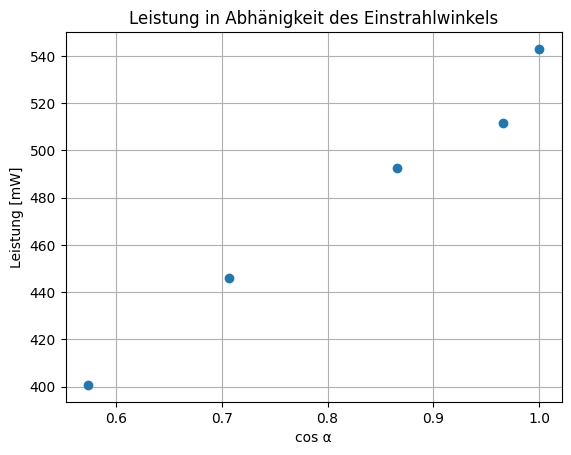

In [58]:
# Die benötigten Werte für die Leistung (p_3) und den Einfallswinkel bzw. den Cosinus von alpha (cos_a) haben wir oben bereits berechnet. Diese können wir wiederverwenden

# Diagramm erzeugen mit plt.plot
plt.plot(cos_a, p_3, "o")

# Achsenbeschriftungen erstellen
plt.xlabel("cos α")
plt.ylabel("Leistung [mW]")
plt.title("Leistung in Abhänigkeit des Einstrahlwinkels")

# Gitternetz hinzufügen
plt.grid()

*Beschreiben Sie hier in **eigenen Worten** den Verlauf des Diagramms*

#### 2. Erklären Sie diese Abhängigkeit geometrisch unter der Voraussetzung $I_\text{K}$ ~ $A$, also einer Proportionalität zwischen Strom und beleuchteter Fläche. Erstellen Sie zur Verdeutlichung eine Zeichnung.

Aufgrund der Komplexizität sehen Sie hier eine Musterlösung für diese Aufgabe:

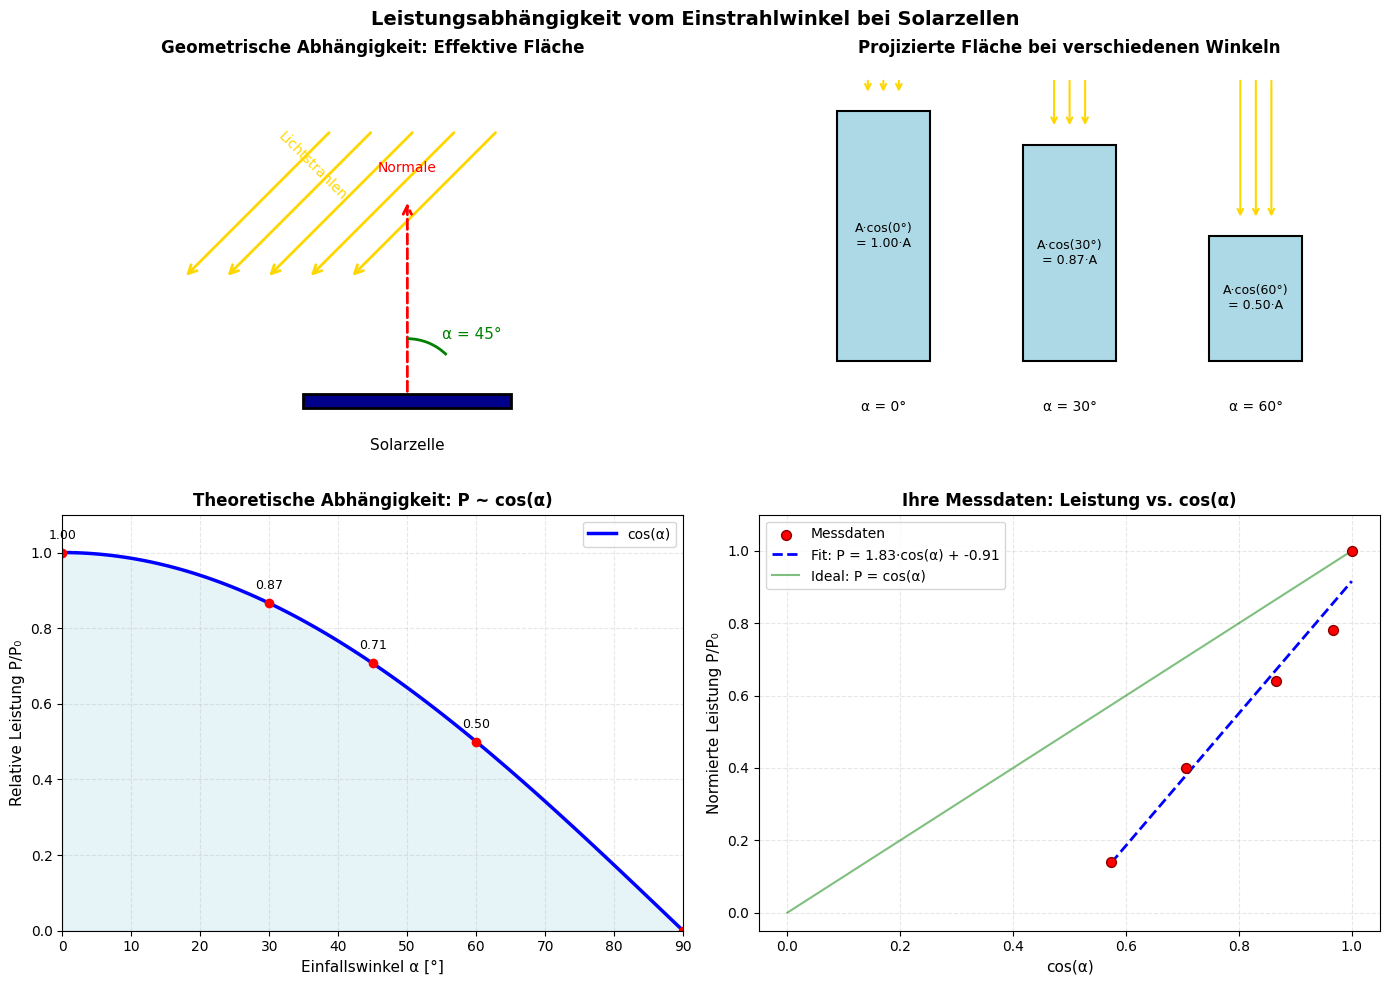


ANALYSE IHRER MESSDATEN
Korrelation zwischen cos(α) und Leistung: 0.9843
Lineare Regression: P = 1370.262 · cos(α) + -683.077
Bestimmtheitsmaß R²: 0.9689

✓ Sehr gute Übereinstimmung mit dem Kosinusgesetz!


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import matplotlib.patches as mpatches

# Erstelle eine Abbildung mit mehreren Subplots
fig = plt.figure(figsize=(14, 10))

# SUBPLOT 1: Geometrische Darstellung
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Geometrische Abhängigkeit: Effektive Fläche', fontsize=12, fontweight='bold')
ax1.set_xlim(-1, 3)
ax1.set_ylim(-0.5, 2.5)
ax1.set_aspect('equal')
ax1.axis('off')

# Solarzelle (Rechteck)
solar_width = 1.5
solar_height = 0.1
solar_cell = Rectangle((0.5, 0), solar_width, solar_height, 
                       facecolor='darkblue', edgecolor='black', linewidth=2)
ax1.add_patch(solar_cell)

# Einstrahlwinkel
angle = 45  # Grad
angle_rad = np.radians(angle)

# Lichtstrahlen
num_rays = 5
for i in range(num_rays):
    x_start = 0.7 + i * 0.3
    y_start = 2
    x_end = x_start - 1.5 * np.sin(angle_rad)
    y_end = y_start - 1.5 * np.cos(angle_rad)
    
    arrow = FancyArrowPatch((x_start, y_start), (x_end, y_end),
                           arrowstyle='->', mutation_scale=15,
                           color='gold', linewidth=2)
    ax1.add_patch(arrow)

# Normale zur Oberfläche
normal_arrow = FancyArrowPatch((1.25, solar_height), (1.25, 1.5),
                              arrowstyle='->', mutation_scale=15,
                              color='red', linewidth=2, linestyle='--')
ax1.add_patch(normal_arrow)

# Winkelmarkierung
arc_angle = mpatches.Arc((1.25, solar_height), 0.8, 0.8, 
                         angle=0, theta1=90-angle, theta2=90,
                         color='green', linewidth=2)
ax1.add_patch(arc_angle)

# Beschriftungen
ax1.text(1.25, 1.7, 'Normale', fontsize=10, ha='center', color='red')
ax1.text(0.3, 1.5, 'Lichtstrahlen', fontsize=10, color='gold', rotation=-angle)
ax1.text(1.5, 0.5, f'α = {angle}°', fontsize=11, color='green')
ax1.text(1.25, -0.3, 'Solarzelle', fontsize=11, ha='center')

# SUBPLOT 2: Projektion der Fläche
ax2 = plt.subplot(2, 2, 2)
ax2.set_title('Projizierte Fläche bei verschiedenen Winkeln', fontsize=12, fontweight='bold')
ax2.set_xlim(-0.5, 3.5)
ax2.set_ylim(-0.5, 2)
ax2.axis('off')

# Drei verschiedene Winkel zeigen
angles_demo = [0, 30, 60]
x_positions = [0, 1.2, 2.4]

for idx, (alpha, x_pos) in enumerate(zip(angles_demo, x_positions)):
    # Effektive Höhe der projizierten Fläche
    eff_height = 1.5 * np.cos(np.radians(alpha))
    
    # Zeichne Rechteck (projizierte Fläche)
    rect = Rectangle((x_pos, 0.2), 0.6, eff_height,
                    facecolor='lightblue', edgecolor='black', linewidth=1.5)
    ax2.add_patch(rect)
    
    # Lichtstrahlen von oben
    for i in range(3):
        arrow = FancyArrowPatch((x_pos + 0.2 + i*0.1, 1.9), 
                              (x_pos + 0.2 + i*0.1, 0.2 + eff_height + 0.1),
                              arrowstyle='->', mutation_scale=10,
                              color='gold', linewidth=1.5)
        ax2.add_patch(arrow)
    
    # Beschriftung
    ax2.text(x_pos + 0.3, -0.1, f'α = {alpha}°', fontsize=10, ha='center')
    ax2.text(x_pos + 0.3, 0.2 + eff_height/2, 
            f'A·cos({alpha}°)\n= {np.cos(np.radians(alpha)):.2f}·A',
            fontsize=9, ha='center', va='center')

# SUBPLOT 3: Theoretische Kurve
ax3 = plt.subplot(2, 2, 3)
ax3.set_title('Theoretische Abhängigkeit: P ~ cos(α)', fontsize=12, fontweight='bold')

# Theoretische Kurve
alpha_theory = np.linspace(0, 90, 100)
cos_theory = np.cos(np.radians(alpha_theory))

ax3.plot(alpha_theory, cos_theory, 'b-', linewidth=2.5, label='cos(α)')
ax3.fill_between(alpha_theory, 0, cos_theory, alpha=0.3, color='lightblue')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_xlabel('Einfallswinkel α [°]', fontsize=11)
ax3.set_ylabel('Relative Leistung P/P₀', fontsize=11)
ax3.set_xlim(0, 90)
ax3.set_ylim(0, 1.1)

# Markiere wichtige Punkte
important_angles = [0, 30, 45, 60, 90]
for angle in important_angles:
    cos_val = np.cos(np.radians(angle))
    ax3.plot(angle, cos_val, 'ro', markersize=6)
    if angle < 90:
        ax3.annotate(f'{cos_val:.2f}', (angle, cos_val), 
                    textcoords="offset points", xytext=(0,10), 
                    ha='center', fontsize=9)

ax3.legend(loc='upper right')

# SUBPLOT 4: Ihre Messdaten
ax4 = plt.subplot(2, 2, 4)
ax4.set_title('Ihre Messdaten: Leistung vs. cos(α)', fontsize=12, fontweight='bold')

# Plotte Ihre Daten (falls vorhanden)
try:
    # Normiere die Leistung auf Maximum = 1
    p_normalized = p_3 / np.max(p_3)
    
    # Scatter plot der Messdaten
    ax4.scatter(cosinus_a, p_normalized, color='red', s=50, 
               label='Messdaten', zorder=5, edgecolors='darkred', linewidth=1)
    
    # Fit einer linearen Regression
    fit_coeffs = np.polyfit(cosinus_a, p_normalized, 1)
    fit_line = np.poly1d(fit_coeffs)
    x_fit = np.linspace(min(cosinus_a), max(cosinus_a), 100)
    ax4.plot(x_fit, fit_line(x_fit), 'b--', linewidth=2, 
            label=f'Fit: P = {fit_coeffs[0]:.2f}·cos(α) + {fit_coeffs[1]:.2f}')
    
    # Ideale Linie P = cos(α)
    ax4.plot([0, 1], [0, 1], 'g-', linewidth=1.5, alpha=0.5, 
            label='Ideal: P = cos(α)')
    
except NameError:
    # Falls die Daten nicht definiert sind, zeige Beispieldaten
    cosinus_a_example = np.array([1.0, 0.866, 0.707, 0.5, 0.259, 0.0])
    p_3_example = cosinus_a_example + np.random.normal(0, 0.02, len(cosinus_a_example))
    p_3_example = np.maximum(p_3_example, 0)  # Keine negativen Werte
    
    ax4.scatter(cosinus_a_example, p_3_example, color='red', s=50, 
               label='Beispiel-Messdaten', zorder=5, edgecolors='darkred', linewidth=1)
    ax4.plot([0, 1], [0, 1], 'g-', linewidth=2, alpha=0.7, 
            label='Ideal: P = cos(α)')

ax4.set_xlabel('cos(α)', fontsize=11)
ax4.set_ylabel('Normierte Leistung P/P₀', fontsize=11)
ax4.set_xlim(-0.05, 1.05)
ax4.set_ylim(-0.05, 1.1)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.legend(loc='upper left')

# Gesamttitel
fig.suptitle('Leistungsabhängigkeit vom Einstrahlwinkel bei Solarzellen', 
            fontsize=14, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Zusätzliche Analyse (falls Daten vorhanden)
try:
    print("\n" + "="*50)
    print("ANALYSE IHRER MESSDATEN")
    print("="*50)
    
    # Berechne Korrelation
    correlation = np.corrcoef(cosinus_a, p_3)[0,1]
    print(f"Korrelation zwischen cos(α) und Leistung: {correlation:.4f}")
    
    # Linearität prüfen
    fit = np.polyfit(cosinus_a, p_3, 1)
    print(f"Lineare Regression: P = {fit[0]:.3f} · cos(α) + {fit[1]:.3f}")
    
    # R² berechnen
    p_fit = np.polyval(fit, cosinus_a)
    ss_res = np.sum((p_3 - p_fit)**2)
    ss_tot = np.sum((p_3 - np.mean(p_3))**2)
    r_squared = 1 - (ss_res / ss_tot)
    print(f"Bestimmtheitsmaß R²: {r_squared:.4f}")
    
    if r_squared > 0.95:
        print("\n✓ Sehr gute Übereinstimmung mit dem Kosinusgesetz!")
    elif r_squared > 0.85:
        print("\n✓ Gute Übereinstimmung mit dem Kosinusgesetz.")
    else:
        print("\n⚠ Moderate Übereinstimmung - mögliche Störfaktoren vorhanden.")
        
except NameError:
    print("\nHinweis: Verwenden Sie Ihre eigenen Daten (p_3 und cosinus_a) für die Analyse.")

#### 3. Welchen Einfallswinkel haben Sonnenstrahlen in Deutschland? Welchen Winkel haben Giebeldächer? Ist der Zusammenhang des durchschnittlichen Daches hierzulande zum Einfallswinkel optimal?

*Ihr Text hier*

#### 4. Wenn Sie ein großes Flachdach mit PV-Anlagen ausrüsten möchten, welchen Winkel und welche Ausrichtung würden Sie wählen und warum? Ändert sich an diesen Werten etwas, wenn das Flachdach zu einem Industriebetrieb im 2-Schicht-System gehört? Wieso, bzw. wieso nicht?

*Ihr Text hier*

---

## 2.4 Versuch  4: Funktionsweise von Shunt, PWM und Serienregler

Untersucht wird, wie verschiedene Reglerarten (Shunt, PWM und Serienregler) das Ladeverhalten eines Kondensators beeinflussen.

---

 **Aufbau, Geräte & Komponenten:**
- Grundeinheit
- Große Solarzelle  
- Lampe  
- AV-Modul  
- Kondensatormodul  
- Shunt, Serien und PWM-Regler   
- Powermodul 
- Stoppuhr

---

**Schaltplan:**

![Schaltplan Versuch4](https://thga.sciebo.de/s/4wSadsp2DGrdQbN/download "Versuch 4")

---

**Durchführung**

1. Bauen Sie den Versuch wie oben dargestellt zunächst mit dem Shunt-Regler auf. Beleuchten Sie die große Solarzelle mit Hilfe der Lampe.
2. Beobachten Sie die Spannung am Kondensator und Starten Sie die Messung, sobald $U_\text{Kond}$ ≈ 4 V und $I_\text{Start}$ ≈ 40 mA betragen. Nehmen Sie dann für 7 min alle 20 s einen Messpunkt auf.
3. Wiederholen Sie den Versuch mit dem Serienregler.
4. Wiederholen Sie den Versuch mit dem PWM-Regler und starten Sie die Messungen, sobald $U_\text{Kond}$ ≈ 4 V beträgt (die Solarzelle sollte weiterhin so positioniert sein, dass die Kurzschlussspannung $I_\text{K}$ ≈ 40 mA beträgt).

---

 **Messgrößen:**
- Kondensatorspannung $( U_\mathrm{Kond})$ $\text{[V]}$  
- Stromstärke $I$ in $\text{[mA]}$  
- Zeit $t$ in $\text{[s]}$

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie in obigen Beispielen, und zeichnen Sie daraus eine Tabelle:

In [59]:
# Ihr Code hier

---

 **Ihre Aufgabe:**
Beschreiben Sie hier **in eigenen Worten**, den Aufbau, die Durchführung und Ihre Beobachtungen
- Welche Startbedingungen gelten für die Messung?
- Was ist beim Wechsel der Regler zu beachten?
- Wie verlaufen Spannung und Strom über die Zeit?
- Welche Unterschiede fallen zwischen den Reglertypen auf?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._
---
 **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

---

**Auswertung**

1. Nennen Sie die Schaltschwellen von Shunt- und Serien- und PWM-Regler.
2. Erläutern Sie die Funktionsweise der drei Regler. Erklären Sie dabei die Unterschiede.
3. Welche Vor- und Nachteile haben Shunt-, PWM- und Serienregler?

#### 1. Nennen Sie die Schaltschwellen von Shunt- und Serien- und PWM-Regler.

*Ihr Text hier*

#### 2. Erläutern Sie die Funktionsweise der drei Regler. Erklären Sie dabei die Unterschiede.

*Ihr Text hier*

#### 3. Welche Vor- und Nachteile haben Shunt-, PWM- und Serienregler?

*Ihr Text hier*

---

## 2.5 Versuch 5: U-I-Kennlinie einer Solarzelle in Abhängigkeit von der Beleuchtungsstärke

#### Aufgabe:
Untersucht wird die U-I Kennlinie einer Solarzelle bei verschiedenen Beleuchtungsstärken. Ziel ist es, die jeweils maximal mögliche Leistung (Maximum Power Point) sowie die Füllfaktoren zu bestimmen.

---

 **Aufbau, Geräte & Komponenten:**
- Grundeinheit
- 1 Mittlere Solarzelle
- Potentiometermodul
- 1 Beleuchtungsmodul
- AV-Modul
- Powermodul (5 V)

---

**Schaltplan:**

![Schaltplan Versuch5](https://thga.sciebo.de/s/MjKEKcYanGHHsw6/download "Versuch 5")

---

**Durchführung**

Führen Sie Spannungs- und Stromstärkemessungen entsprechend der folgenden Angaben durch. Achten Sie auf die richtige Schaltung bei der Messung der Leerlaufspannung und dem Kurzschlussstrom (Umstellen am AV-Modul). Regeln Sie die Spannung mithilfe des Potentiometermoduls in **50 mV-Schritten**.
Wiederholen Sie die Messungen für 3, 2 und 1 leuchtende Glühbirne(n) im Beleuchtungsmodul.

1. Messpunkt 1: Leerlaufspannung (Spannungsmessmodus am AV-Modul).
2. Messpunkt 2: Beide Potentiometer am Potentiometermodul auf den maximalen Widerstand (1 kΩ, 100 Ω) einstellen (Spannungs- und Stromstärkemessmodus am AV-Modul).
3. Messpunkte 3 bis n: Messung alle 50 mV. Zunächst das 1 kΩ Potentiometer verstellen, dann mit das 100 Ω Potentiometer herunterdrehen. Die Messungen solange fortführen, bis beide Potentiometer auf 0 Ω eingestellt sind.
4. Messpunkt n+1: Kurzschlussstrom-Messung (AV-Modul im Stromstärkemodus direkt an die Solarzelle anschließen).

---

 **Messgrößen:**
- Spannung $U$ in $\text{[mV]}$
- Strom $I$ in $\text{[mA]}$
- Leistung $P = U \cdot I$ in $\text{[mW]}$

---

**Messdaten**

Notieren Sie hier Ihre Messdaten. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie in obigen Beispielen, und zeichnen Sie daraus eine Tabelle:



In [74]:
# Ihr Code hier. Nutzen Sie als Benennung z. B. u5_4gb für 4 Glühbirnen usw.

u5_4gb = [521, 521, 464, 415, 368, 331, 273, 212, 153, 91, 42, 0] # Achten Sie darauf, ob Sie die Messwerte in mV oder V notieren. Hier im Beispiel sind die Daten in mV
i5_4gb = [0, 1.3, 9.9, 12, 12.7, 12.9, 13, 13.1, 13.1, 13.1, 13.1, 13.2]

# Fügen Sie hier Ihre weiteren Messdaten ein

df5_4gb = pd.DataFrame({
    "U [mV]": u5_4gb,
    "I [mA]": i5_4gb})

# Index setzen
df5_4gb.index = [f"Messpunkt {i+1}" for i in range(len(df5_4gb))]

# Tabelle erstellen und anzeigen
print("Tabelle 7:Messwerte für Bestrahlung mit 4 Glühbirnen")
display(df5_4gb.round(2).style.format({
    "U [mV]": "{:.0f}",
    "I [mA]": "{:.1f}"
}))

Tabelle 7:Messwerte für Bestrahlung mit 4 Glühbirnen


,U [mV],I [mA]
Messpunkt 1,521,0.0
Messpunkt 2,521,1.3
Messpunkt 3,464,9.9
Messpunkt 4,415,12.0
Messpunkt 5,368,12.7
Messpunkt 6,331,12.9
Messpunkt 7,273,13.0
Messpunkt 8,212,13.1
Messpunkt 9,153,13.1
Messpunkt 10,91,13.1


---

 **Ihre Aufgabe:**
Beschreiben Sie hier **in eigenen Worten**,den Aufbau, die Durchführung und Ihre Beobachtungen.:
- Wie wird die Beleuchtung variiert?
- Wie wird die Spannung an der Solarzelle verändert?
- Welche Beobachtungen ergaben sich beim Vergleich der Beleuchtungsstufen?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._

 ---
  **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

**Auswertung**

1. Zeichnen Sie die alle $U-I$-Kennlinien für die unterschiedlichen Beleuchtungsstärken in ein gemeinsames Diagramm.
2. Bestimmen Sie für jede Kennlinie den MPP und den Füllfaktor. Zeichnen Sie die MPPs in das Diagramm ein.
3. Vergleichen Sie die Werte der MPP und FF der verschiedenen Beleuchtungsstärken untereinander.

#### 1. Zeichnen Sie die alle $U-I$-Kennlinien für die unterschiedlichen Beleuchtungsstärken in ein gemeinsames Diagramm.

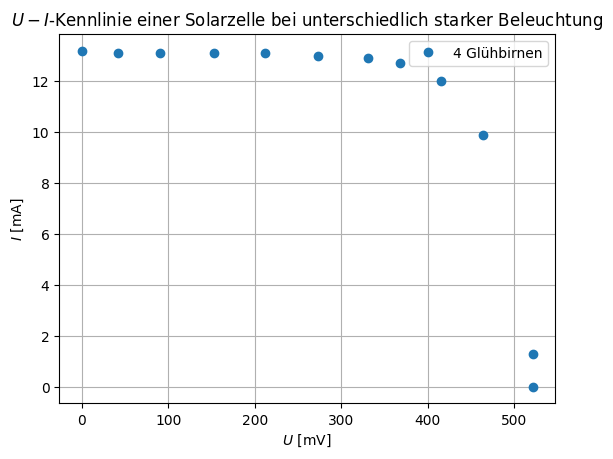

In [69]:
# Hier steht schon ein Teil des Codes, den Sie erweitern können:

# Graphen erstellen
plt.plot(u5_4gb, i5_4gb, "o", label="4 Glühbirnen")

# Achsenbeschriftung
plt.xlabel(r"$ U ~ \text{[mV]}$")
plt.ylabel(r"$ I ~ \text{[mA]}$")

# Diagrammbeschriftung
plt.title(r"$U-I$-Kennlinie einer Solarzelle bei unterschiedlich starker Beleuchtung")

# Legende
plt.legend()

# Gitternetz
plt.grid()

#### 2. Bestimmen Sie für jede Kennlinie den MPP und den Füllfaktor. Zeichnen Sie die MPPs in das Diagramm ein.

Bestimmtheitsmaß (R²): 0.9146 für 4 Glühbirnen
 
4 Glühbirnen:
x = 362.52 ist ein Maximum (f''(x) = -0.0003)
x = 31.25 ist ein Minimum (f''(x) = 0.0003)
 
 
Der MPP mit 4 Glühbirnen liegt bei 4.91 mW
 
Der Füllfaktor mit 4 Glühbirnen liegt bei 0.7145
 


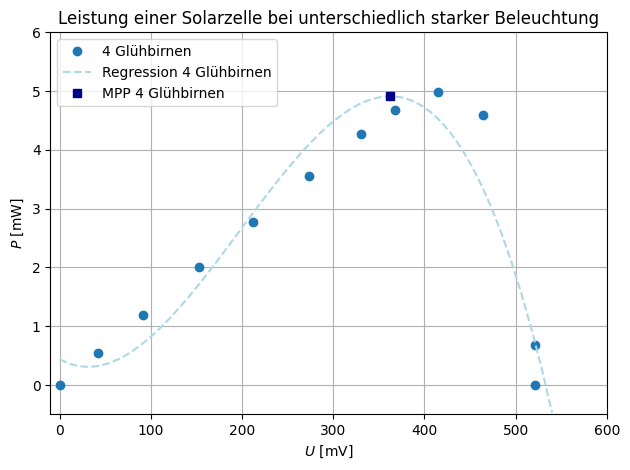

In [73]:
# Berechnung der Leistung in mW
p5_4gb = df5_4gb["U [mV]"] * df5_4gb["I [mA]"] / 1000 # Faktor 1000 wegen Umrechnung in mW
# Fügen Sie hier Ihre weiteren Berechnungen hinzu

# Fit einer kubischen Regressionskurve
reg_4gb = np.poly1d(np.polyfit(u5_4gb, p5_4gb, 3))


# Zeichnen der Regressionskurve und der Messdaten
reg_area = np.linspace(0, 540, 50)
plt.plot(u5_4gb, p5_4gb, "o", label="4 Glühbirnen")
plt.plot(reg_area, reg_4gb(reg_area), "--", color="lightblue", label="Regression 4 Glühbirnen")


# Achsenbeschriftung
plt.xlabel(r"$ U ~ \text{[mV]}$")
plt.ylabel(r"$ P ~ \text{[mW]}$")

# Diagrammbeschriftung
plt.title("Leistung einer Solarzelle bei unterschiedlich starker Beleuchtung")

# Gitternetz
plt.grid()

# Berechnung des Bestimmtheitsmaßes einer kubischen Funktion
regression_kubisch_4gb = np.poly1d(np.polyfit(u5_4gb, p5_4gb, 3))


leistung_pred_kubisch_4gb = regression_kubisch_4gb(u5_4gb)


SSR_kubisch_4gb = np.sum((p5_4gb - leistung_pred_kubisch_4gb) ** 2)


SST_kubisch_4gb = np.sum((p5_4gb - np.mean(p5_4gb)) ** 2)


R_squared_kubisch_4gb = 1 - (SSR_kubisch_4gb / SST_kubisch_4gb)


print(f"Bestimmtheitsmaß (R²): {R_squared_kubisch_4gb:.4f}", "für 4 Glühbirnen")

print(" ")

# Bestimmung des MPP
regression_kubisch_4gb = np.poly1d(np.polyfit(u5_4gb, p5_4gb, 3))


ableitung_4gb=np.polyder(regression_kubisch_4gb)


zweite_ableitung_4gb=np.polyder(ableitung_4gb)


nullstellen_4gb=np.roots(ableitung_4gb)


print("4 Glühbirnen:")
for x in nullstellen_4gb:
    wert_zweite_ableitung_4gb = zweite_ableitung_4gb(x)
    if wert_zweite_ableitung_4gb > 0:
        print(f"x = {x:.2f} ist ein Minimum (f''(x) = {wert_zweite_ableitung_4gb:.4f})")
    elif wert_zweite_ableitung_4gb < 0:
        print(f"x = {x:.2f} ist ein Maximum (f''(x) = {wert_zweite_ableitung_4gb:.4f})")
    else:
        print(f"x = {x:.2f} könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung_4gb:.4f})")

print(" ")


MPP_4gb=regression_kubisch_4gb(nullstellen_4gb[0])

print(" ")
print("Der MPP mit 4 Glühbirnen liegt bei", f"{MPP_4gb:.2f}", "mW")


#  Füllfaktor (FF) berechnen mit FF = MPP / (Ul * IK)
FF_4gb   = MPP_4gb / (u5_4gb[0] * i5_4gb[-1] / 1000) # Die Leerlaufspannung ist in der Messreihe der jeweils erste Messwert, der Kurzschlussstrom immer der jeweils letzte

print(" ")
print("Der Füllfaktor mit 4 Glühbirnen liegt bei", f"{FF_4gb:.4f}")



# Text im Diagramm
plt.plot(nullstellen_4gb[0], MPP_4gb, "s", label="MPP 4 Glühbirnen", color="darkblue")

# Legende
plt.legend(loc="upper left")

# x- und y-Achsenskalierung
plt.xlim(-10, 600)
plt.ylim(-0.5, 6)

print(" ")
plt.tight_layout()
plt.show()


#### 3. Vergleichen Sie die Werte der MPP und FF der verschiedenen Beleuchtungsstärken untereinander.

*Ihr Text hier*

---

# 3. Quellen